<a href="https://colab.research.google.com/github/Camilarcila/Entregas-de-proyectos_Camila-Arcila/blob/main/01%20-%20Exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pubg Finish Placement Prediction

# Importar datos

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [3]:
!pip install -q kaggle
from google.colab import files
import json

In [4]:
js = {"username":"alexanderbedoya","key":"2a3569a84dbefd96bc7a8155fea16f07"}
with open('kaggle.json', 'w') as file:
    json.dump(js, file, indent=4)

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c pubg-finish-placement-prediction
! unzip pubg-finish-placement-prediction.zip

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           2503        119  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           2503        102  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data                                  10MB  2022-08-01 15:58:10           1726         61  0.9705882        
ericsims/world-cheese-awards-worlds-cheesiest-dataset  World Cheese Awards (World's Cheesiest Dataset)   49KB  2022-08-1

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline

In [7]:
data = pd.read_csv("train_V2.csv")

# información del dataset

In [8]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


Las columnas Id, groupId y matchId no aportan información. Se borran.

In [9]:
data = data.drop(['Id'], axis=1)
data = data.drop(['groupId'], axis=1)
data = data.drop(['matchId'], axis=1)
data.head(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400


In [10]:
data.shape

(4446966, 26)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        object 
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(19), object(1)
memory

In [12]:
data.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [13]:
df = data.sample(200000)

In [14]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1267748,0,0,0.00,0,0,0,78,0,0,0,...,0,0.0,0,0.0,0,0,119.8,1,0,0.2391
3753361,0,0,0.00,0,0,0,79,1058,0,0,...,0,0.0,0,0.0,0,0,416.9,2,1487,0.1538
3034738,0,0,504.10,2,0,0,4,0,4,2,...,0,0.0,0,0.0,0,0,115.8,1,0,0.1250
1743502,1,2,246.50,1,0,3,32,0,1,1,...,1,0.0,0,0.0,0,0,620.3,4,0,0.2593
2143964,0,3,125.20,0,0,5,24,0,1,1,...,0,0.0,0,0.0,0,0,3077.0,6,0,0.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657082,0,2,269.40,2,1,0,15,1485,2,1,...,0,0.0,0,0.0,0,0,2129.0,3,1653,0.9792
1729365,0,2,90.15,0,0,0,40,1336,0,0,...,0,1307.0,0,0.0,0,0,4141.0,4,1574,0.8125
2115431,0,1,0.00,0,0,1,53,1267,0,0,...,0,0.0,0,0.0,0,0,534.4,1,1544,0.5638
2900080,0,0,24.51,0,0,0,78,0,0,0,...,0,0.0,0,0.0,0,0,141.1,1,0,0.1923


# Requisitos del dataset

Las variables 'killPlace', 'maxPlace' y 'matchType' y se manipularán como variables categóricas.

In [15]:
df['killPlace'] = df['killPlace'].astype('category')
df['maxPlace'] = df['maxPlace'].astype('category')
df['matchType'] = df['matchType'].astype('category')

**rankPoints** - Ranking de jugadores tipo Elo. Esta clasificación es inconsistente y está obsoleta en la próxima versión de la API, así que utilícela con precaución. El valor de -1 reemplaza a “Ninguno”.

**killPoints** - Clasificación externa de jugadores basada en muertes. (Piense en esto como una clasificación de Elo donde solo importan las muertes). Si hay un valor distinto de -1 en rankPoints, entonces cualquier 0 en killPoints debe tratarse como 'Ninguno'.

**winPoints** - Ranking externo de jugadores basado en victorias. (Piense en esto como una clasificación de Elo en la que solo importa ganar). Si hay un valor distinto de -1 en rankPoints, entonces cualquier 0 en winPoints debe tratarse como 'Ninguno'.

In [16]:
df[df['rankPoints']==-1].shape

(76792, 26)

In [17]:
df[(df['rankPoints']!=-1) & (df['killPoints']==0)].shape

(119184, 26)

In [18]:
df[(df['rankPoints']!=-1) & (df['winPoints']==0)].shape

(119184, 26)

In [19]:
df['rankPoints'].replace(-1, np.NaN, inplace=True)
df['killPoints'].replace(0, np.NaN, inplace=True)
df['winPoints'].replace(0, np.NaN, inplace=True)

In [20]:
df['rankPoints']

1267748    1511.0
3753361       NaN
3034738    1478.0
1743502    1444.0
2143964    1510.0
            ...  
3657082       NaN
1729365       NaN
2115431       NaN
2900080    1493.0
3417580    1512.0
Name: rankPoints, Length: 200000, dtype: float64

In [21]:
df['rankPoints'].value_counts()

1500.0    13401
0.0        4024
1480.0     2209
1494.0     1941
1490.0     1878
          ...  
2235.0        1
2125.0        1
2214.0        1
2377.0        1
843.0         1
Name: rankPoints, Length: 1192, dtype: int64

In [22]:
df.isnull().sum()

assists                 0
boosts                  0
damageDealt             0
DBNOs                   0
headshotKills           0
heals                   0
killPlace               0
killPoints         119184
kills                   0
killStreaks             0
longestKill             0
matchDuration           0
matchType               0
maxPlace                0
numGroups               0
rankPoints          76792
revives                 0
rideDistance            0
roadKills               0
swimDistance            0
teamKills               0
vehicleDestroys         0
walkDistance            0
weaponsAcquired         0
winPoints          119184
winPlacePerc            0
dtype: int64

Simular valores faltantes

In [23]:
d = df.T.dropna().T.columns

In [24]:
import random as rnd
columns = []
for i in range(3):
    columns.append(rnd.choice(d))
columns

['heals', 'walkDistance', 'damageDealt']

In [25]:
columns = ['damageDealt', 'longestKill', 'walkDistance']

In [26]:
for col in columns:
    num_datos = df.shape[0]*(rnd.randint(50,120)/1000)
    index_datos = rnd.sample(range(1, df.shape[0], 1), int(num_datos))
    for i in index_datos:
        df[col].iloc[i] = np.NaN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
g = df.isna().sum()
g[g!=0]

damageDealt      21000
killPoints      119184
longestKill      18600
rankPoints       76792
walkDistance     15800
winPoints       119184
dtype: int64

# Explorar variable a predecir

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


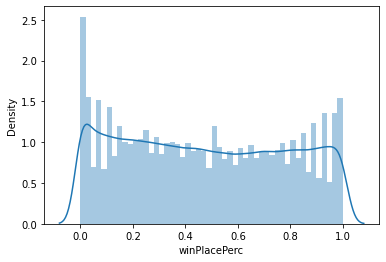

In [28]:
sns.distplot(df['winPlacePerc'])

In [29]:
win_no_damage = df[(df['winPlacePerc']==1) & (df['damageDealt']==0)].shape[0]
print("Jugadores o equipos que ganan la partida sin hacer daño:", win_no_damage)

Jugadores o equipos que ganan la partida sin hacer daño: 183


In [30]:
win_no_kills = df[(df['winPlacePerc']==1) & (df['kills']==0)].shape[0]
print("Jugadores o equipos que ganan la partida sin hacer muertes:", win_no_kills)

Jugadores o equipos que ganan la partida sin hacer muertes: 761


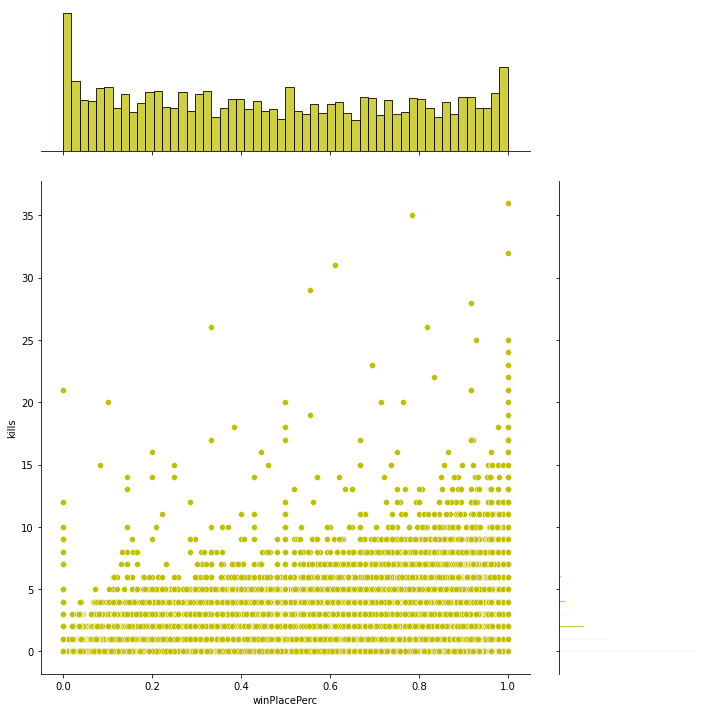

In [31]:
sns.jointplot(x="winPlacePerc",y="kills",data=df,height=10,ratio=3,color='y')
plt.show()

# Explorar variables numéricas

Resumen numérico

In [32]:
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
assists,200000.0,0.235240,0.591180,0.0,0.0,0.0000,0.0000,13.0
boosts,200000.0,1.116310,1.725392,0.0,0.0,0.0000,2.0000,19.0
damageDealt,179000.0,131.140990,171.009486,0.0,0.0,84.9800,186.2000,3441.0
DBNOs,200000.0,0.659450,1.147132,0.0,0.0,0.0000,1.0000,26.0
headshotKills,200000.0,0.226230,0.598717,0.0,0.0,0.0000,0.0000,21.0
heals,200000.0,1.373685,2.682031,0.0,0.0,0.0000,2.0000,48.0
killPoints,80816.0,1254.614557,197.552790,184.0,1090.0,1241.0000,1388.0000,2170.0
kills,200000.0,0.928190,1.556430,0.0,0.0,0.0000,1.0000,36.0
killStreaks,200000.0,0.545185,0.710458,0.0,0.0,0.0000,1.0000,8.0
longestKill,181400.0,23.184323,51.249835,0.0,0.0,0.0000,21.6625,1075.0


Correlación

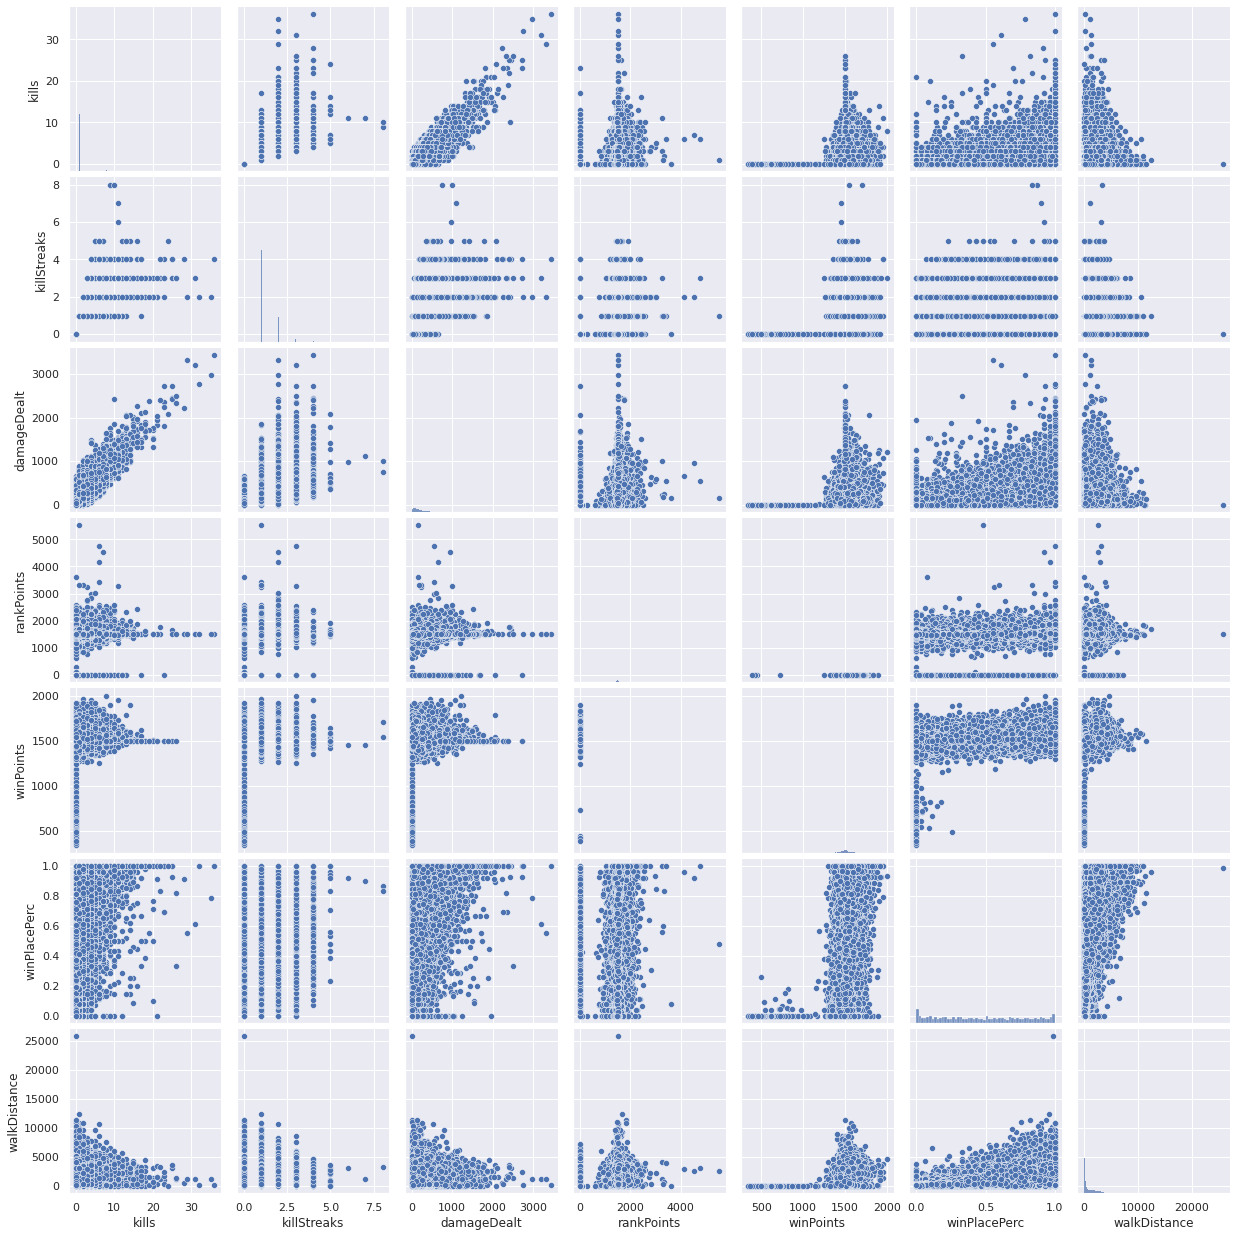

In [33]:
cols = ['kills', 'killStreaks', 'damageDealt', 'rankPoints', 'winPoints', 'winPlacePerc', 'walkDistance']
sns.set()
sns.pairplot(df[cols])

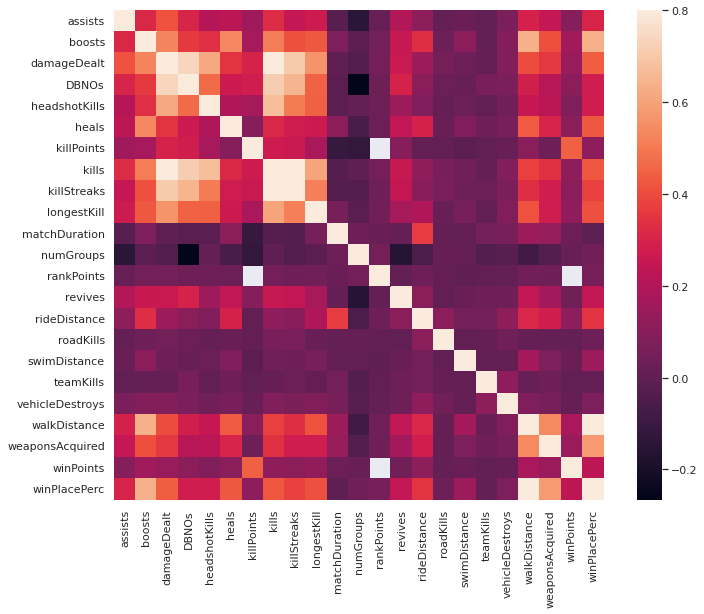

In [34]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Explorar variable categóricas

In [35]:
ccols = [i for i in df.columns if not i in df._get_numeric_data()]
print (ccols)

['killPlace', 'matchType', 'maxPlace']


In [36]:
for c in ccols:
    print ("%10s"%c, np.unique(df[c].dropna()))
    print()

 killPlace [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

 matchType ['crashfpp' 'crashtpp' 'duo' 'duo-fpp' 'flarefpp' 'flaretpp' 'normal-duo'
 'normal-duo-fpp' 'normal-solo' 'normal-solo-fpp' 'normal-squad'
 'normal-squad-fpp' 'solo' 'solo-fpp' 'squad' 'squad-fpp']

  maxPlace [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90

In [37]:
df['matchType'].value_counts()

squad-fpp           79212
duo-fpp             44726
squad               28169
solo-fpp            24085
duo                 14041
solo                 8197
normal-squad-fpp      764
crashfpp              294
normal-duo-fpp        237
flaretpp              109
normal-solo-fpp        72
flarefpp               29
normal-squad           24
crashtpp               18
normal-solo            15
normal-duo              8
Name: matchType, dtype: int64

# Examinar valores faltantes

In [38]:
k = df.isna().sum()
k[k!=0]

damageDealt      21000
killPoints      119184
longestKill      18600
rankPoints       76792
walkDistance     15800
winPoints       119184
dtype: int64

# Data cleaning

In [39]:
def plot_missing(d, col, target):
    
    def f1(): 
        if d[col].dtype==object:
            k = d[col].fillna("missing").value_counts()
            sns.barplot(k.index, k.values)
        else:
            sns.distplot(d[col].dropna())
        plt.title("distribution of %s"%col)
        plt.grid()
        
    def f2(): 
        if d[col].dtype==object:
            k=d[[col,target]].dropna()
            for v in d[col].dropna().unique():
                if sum(k[col]==v)>1:
                    sns.distplot(k[target][k[col]==v], 
                                 hist_kws=dict(alpha=.3), 
                                 kde_kws=dict(linewidth=1, alpha=.8),
                                 label=v);
            if sum(d[col].isna())>1:
                sns.distplot(d[target][d[col].isna()], 
                             hist_kws=dict(alpha=.8), 
                             kde_kws=dict(linewidth=1, alpha=1),
                             label="missing")
            plt.legend();
        else:
            plt.scatter(d[col], d[target], alpha=.5)
            plt.xlabel(target)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs target"%(col))
        
    def f3(): 
        n = np.sum(d[col].isna())
        if n>1:
            sns.distplot(d[target][d[col].isna()], color="red",  hist_kws=dict(alpha=.3), label="missing (%d values)"%n)
        sns.distplot(d[target][~d[col].isna()], color="blue",  hist_kws=dict(alpha=.3), label="ok (%d values)"%(len(d)-n))
        plt.title("distribution of target wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()
        
    mlutils.figures_grid(3,1, [f1, f2, f3], figsize=(20,3))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

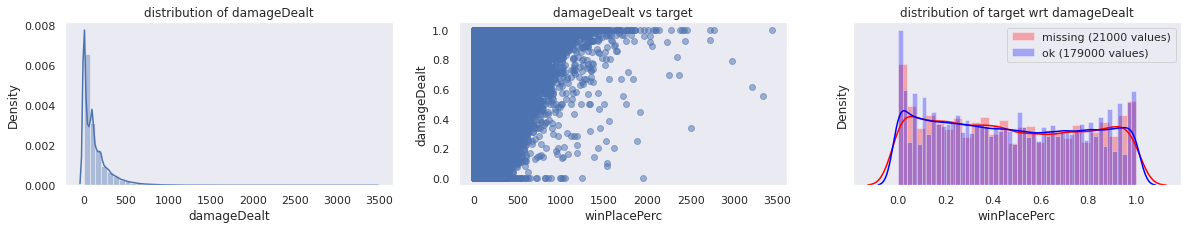

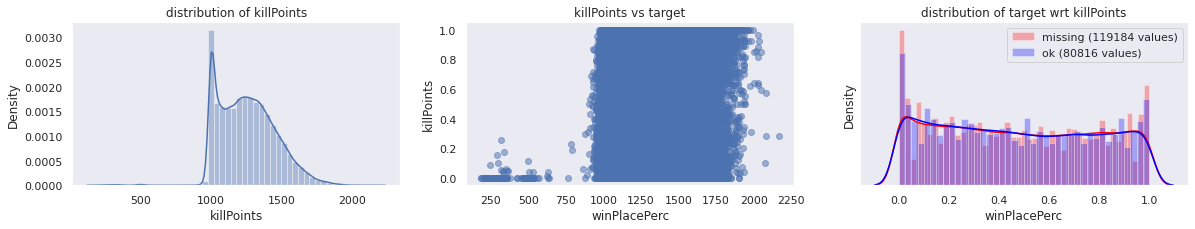

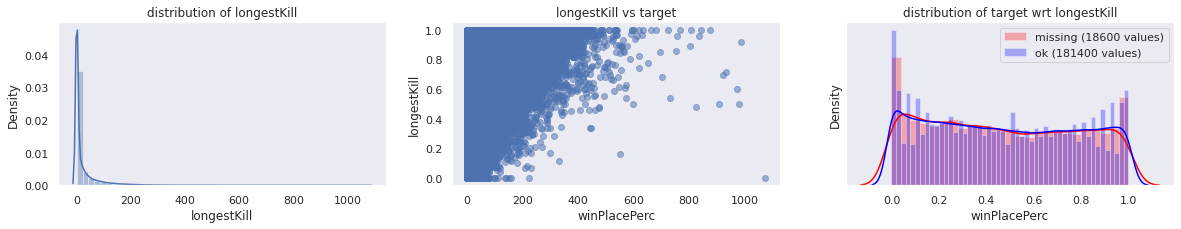

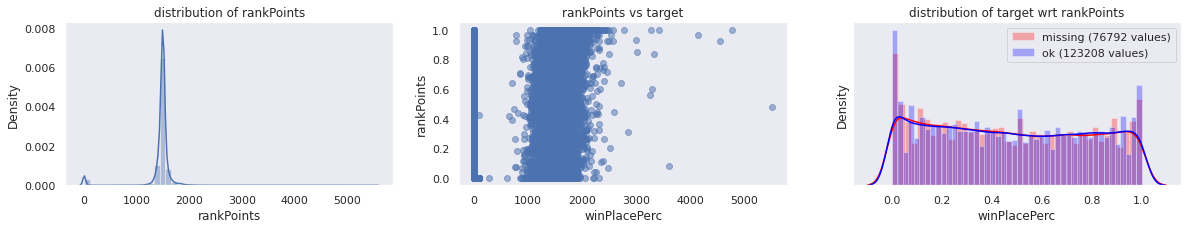

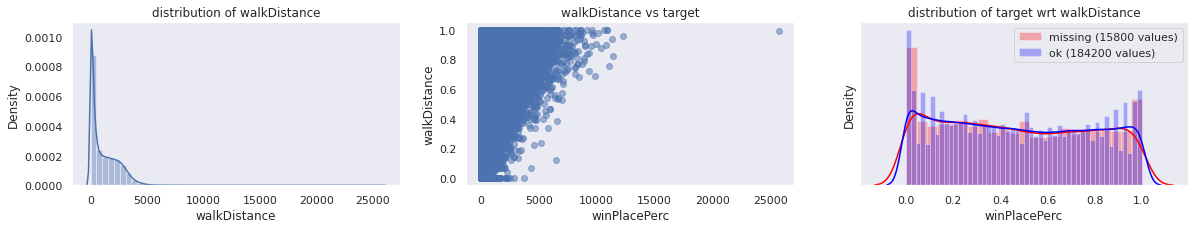

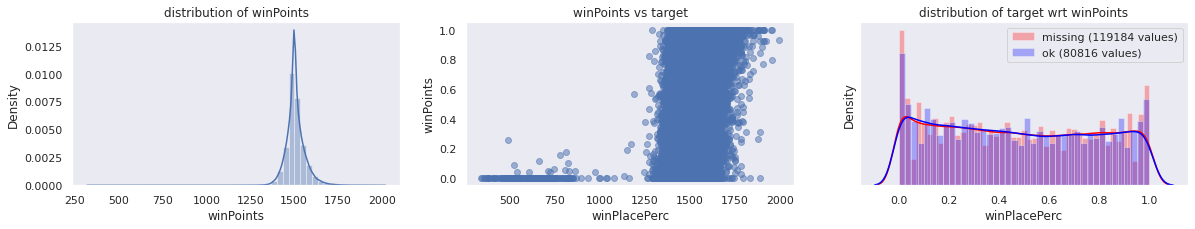

In [40]:
for col in k[k!=0].index:
    plot_missing(df, col, 'winPlacePerc')

Reemplazar valores faltantes

In [41]:
def xdistplot(k, title="", xlim=None):
    vals = k
    sns.distplot(k, hist_kws={"alpha": .8});
    m,s = np.mean(vals), np.std(vals)
    plt.axvline(m, color="black", lw=2, alpha=.5)
    plt.axvline(m+s, color="red", lw=2, alpha=.5)
    plt.axvline(m-s, color="red", lw=2, alpha=.5)
    x = np.linspace(np.min(vals), np.max(vals), 100)
    plt.title(title)
    plt.grid();
    if xlim is not None:
        plt.xlim(xlim)

In [42]:
def subs_policies(d, col):
    mcol = "%s_missing"%col
    dn = d.T.dropna().T
    dn = dn[[i for i in dn.columns if d[i].dtype!=object]]
    print (dn.shape)
    
    na_idxs = np.argwhere(d[col].isna().values)[:,0]

    dl0 = dn.copy()
    dlm = dn.copy()
    dlr = dn.copy()

    dl0[mcol] = d[col].fillna(0)
    dlm[mcol] = d[col].fillna( d[col].mean())

    k = d[col].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dlr[mcol] = k

    f0 = lambda: xdistplot(d[col].dropna(), "original", [0, d[col].max()])
    f1 = lambda: xdistplot(dl0[mcol], "subs by zero", [0,d[col].max()])
    f2 = lambda: xdistplot(dlm[mcol], "subs by mean", [0,d[col].max()])
    f3 = lambda: xdistplot(dlr[mcol], "subs by equivalent normal", [0,d[col].max()])

    mlutils.figures_grid(4,1, [f0, f1, f2, f3], figsize=(20,3))
    return dn, dl0, dlm, dlr, na_idxs

In [43]:
columns = ['damageDealt', 'longestKill', 'walkDistance']

(200000, 20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

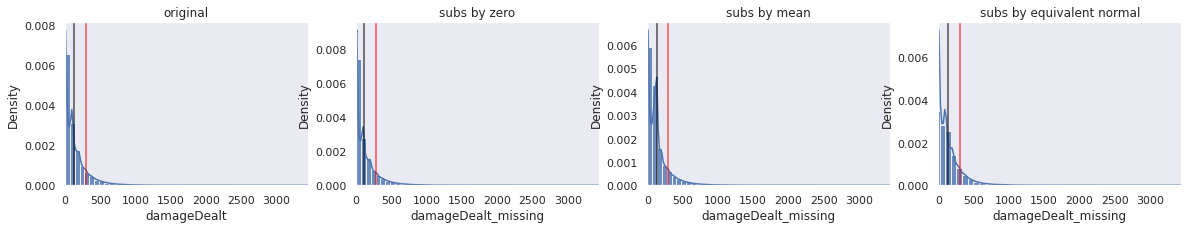

In [44]:
dn1, dl01, dlm1, dlr1, na_idxs1 = subs_policies(df, "damageDealt")

In [45]:
df[df['damageDealt']>1000]['winPlacePerc'].mean()

0.8934517857142857

(200000, 20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

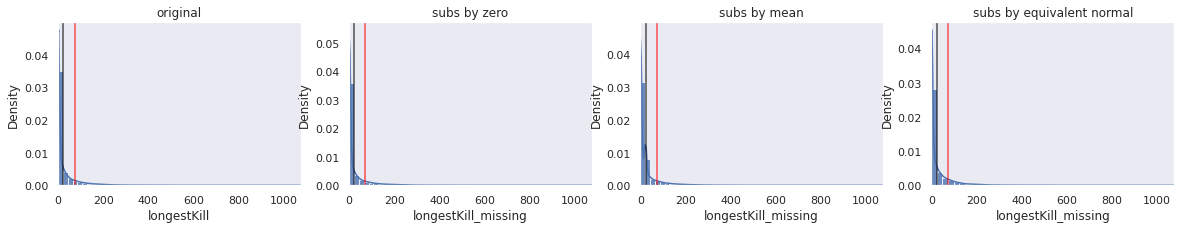

In [46]:
dn2, dl02, dlm2, dlr2, na_idxs2 = subs_policies(df, "longestKill")

In [47]:
df[df['longestKill']>150]['winPlacePerc'].mean()

0.8390737346908662

(200000, 20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

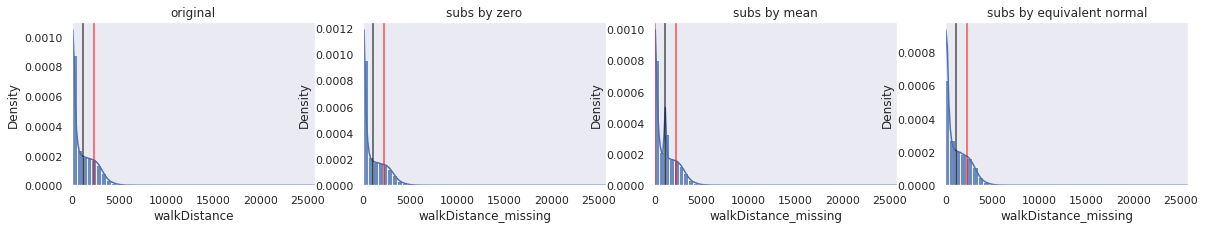

In [48]:
dn3, dl03, dlm3, dlr3, na_idxs3 = subs_policies(df, "walkDistance")

In [49]:
df[df['walkDistance']>3000]['winPlacePerc'].mean()

0.8718727952803795

### Flujo de trabajo de validación para reparar valores faltantes en **walkDistance**

**¿Qué política es mejor para reparar datos perdidos?**

Nuestra hipótesis nula (no hay efecto en el uso de la nueva variable):

$$H_0: \mu_{e_1}-\mu_{e_2}=0 \Rightarrow \mu_{e_1-e_2}=0$$


Nuestra hipótesis de prueba (incluyendo fillna=0 mejora los modelos):

$$H_1: \mu_{e_1}-\mu_{e_2}<0 \Rightarrow \mu_{e_1-e_2}<0$$


In [50]:
columns_category = ['matchType', 'killPlace', 'maxPlace']

In [51]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from scipy.stats import ttest_ind

def getXY (dn):
    xcols = [i for i in dn.columns if i!="winPlacePerc" and not i in columns_category]
    X = dn[xcols].values.astype(float)
    y = dn.winPlacePerc.values.astype(float)
    return X,y,xcols

def experiment(dn, estimator, n_models=5, test_size=.3):
    X,y,_ = getXY(dn)
    r = cross_val_score(estimator, X, y, cv=ShuffleSplit(n_models, test_size=test_size), 
                        scoring=make_scorer(mean_absolute_error))
    return r

def HTest(ref_dataset, h_datasets, n_models=10, experiment=experiment, **kwargs):
    estimator = RandomForestRegressor(n_estimators=20)
    re = [experiment(i, estimator, n_models=n_models, **kwargs) for i in pbar([ref_dataset]+h_datasets)]

    for r in re[1:]:
        print (ttest_ind(re[0],r))

In [52]:
HTest(dn3, [dl03, dlm3, dlr3], n_models=5)

100% (4 of 4) |##########################| Elapsed Time: 0:05:51 Time:  0:05:51


Ttest_indResult(statistic=157.83616489246384, pvalue=2.904449792814422e-15)
Ttest_indResult(statistic=157.5616511493439, pvalue=2.945168152985294e-15)
Ttest_indResult(statistic=137.138481531364, pvalue=8.938783414063486e-15)


In [53]:
HTest(dn1, [dl01, dlm1, dlr1], n_models=5)

100% (4 of 4) |##########################| Elapsed Time: 0:05:11 Time:  0:05:11


Ttest_indResult(statistic=11.126103523352317, pvalue=3.8063884565604437e-06)
Ttest_indResult(statistic=13.978867168515805, pvalue=6.64796725535134e-07)
Ttest_indResult(statistic=13.001631912782441, pvalue=1.1612165095230258e-06)


In [54]:
HTest(dn2, [dl02, dlm2, dlr2], n_models=5)

100% (4 of 4) |##########################| Elapsed Time: 0:04:50 Time:  0:04:50


Ttest_indResult(statistic=10.132650219320254, pvalue=7.69218016394474e-06)
Ttest_indResult(statistic=12.644538131867165, pvalue=1.4375656826046335e-06)
Ttest_indResult(statistic=8.150756621867613, pvalue=3.816758469494765e-05)
